In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir('/content/gdrive/My Drive/AgricAI')

In [0]:
os.mkdir('AgricAI')

In [0]:
os.chdir('AgricAI')

In [0]:
!pwd

/content/gdrive/My Drive/AgricAI


Download the data
[link text](https://)







In [0]:
!git clone https://github.com/SpikerJG/PlantDiseaseData.git PlantDiseaseDatai

Cloning into 'PlantDiseaseDatai'...
remote: Enumerating objects: 2, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 54367 (delta 0), reused 0 (delta 0), pack-reused 54365
Receiving objects: 100% (54367/54367), 803.83 MiB | 15.00 MiB/s, done.
Checking out files: 100% (54305/54305), done.


In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [0]:
PATH_IMG = Path('PlantDiseaseDatai')

## Data Exploration and Preprocessing

In [0]:
bs = 64

In [0]:
img_data = ImageDataBunch.from_folder(path=PATH_IMG, train='Train', valid='Test', ds_tfms=get_transforms(), size=224, bs=bs)
img_data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (43429 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab
Path: PlantDiseaseDatai;

Valid: LabelList (10876 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab
Path: PlantDiseaseDatai;

Test: None

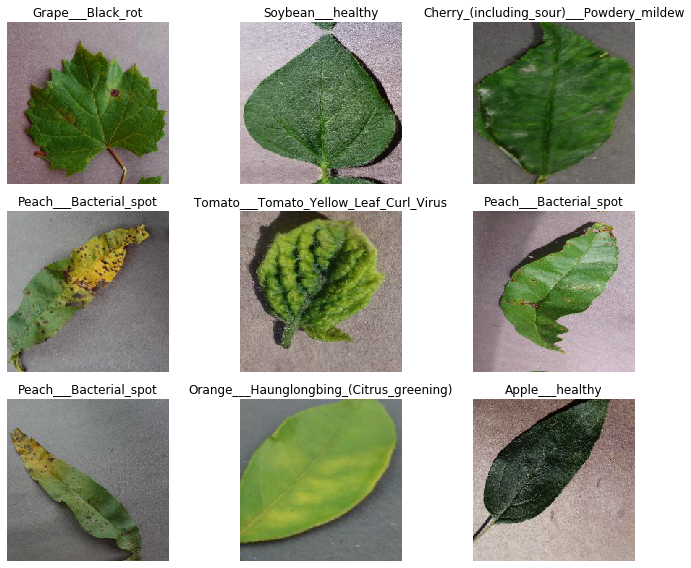

In [0]:
img_data.show_batch(rows=3, figsize=(10,8))

In [0]:
img_data.c

38

In [0]:
img_data.classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

## Model Selection

In [0]:
model = cnn_learner(img_data, models.resnet34, metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
model.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.307977,0.140267,0.955866,0.044134,08:38
1,0.181895,0.077297,0.974255,0.025745,08:25
2,0.114515,0.044960,0.986024,0.013976,08:36
3,0.076350,0.033720,0.989334,0.010666,08:40
4,0.063819,0.029646,0.990346,0.009654,08:39


In [0]:
model.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.095687,0.037376,0.988875,0.011125,08:37
1,0.057001,0.027267,0.990989,0.009011,08:40


In [0]:
model.save('train_7_cycles')

## Results

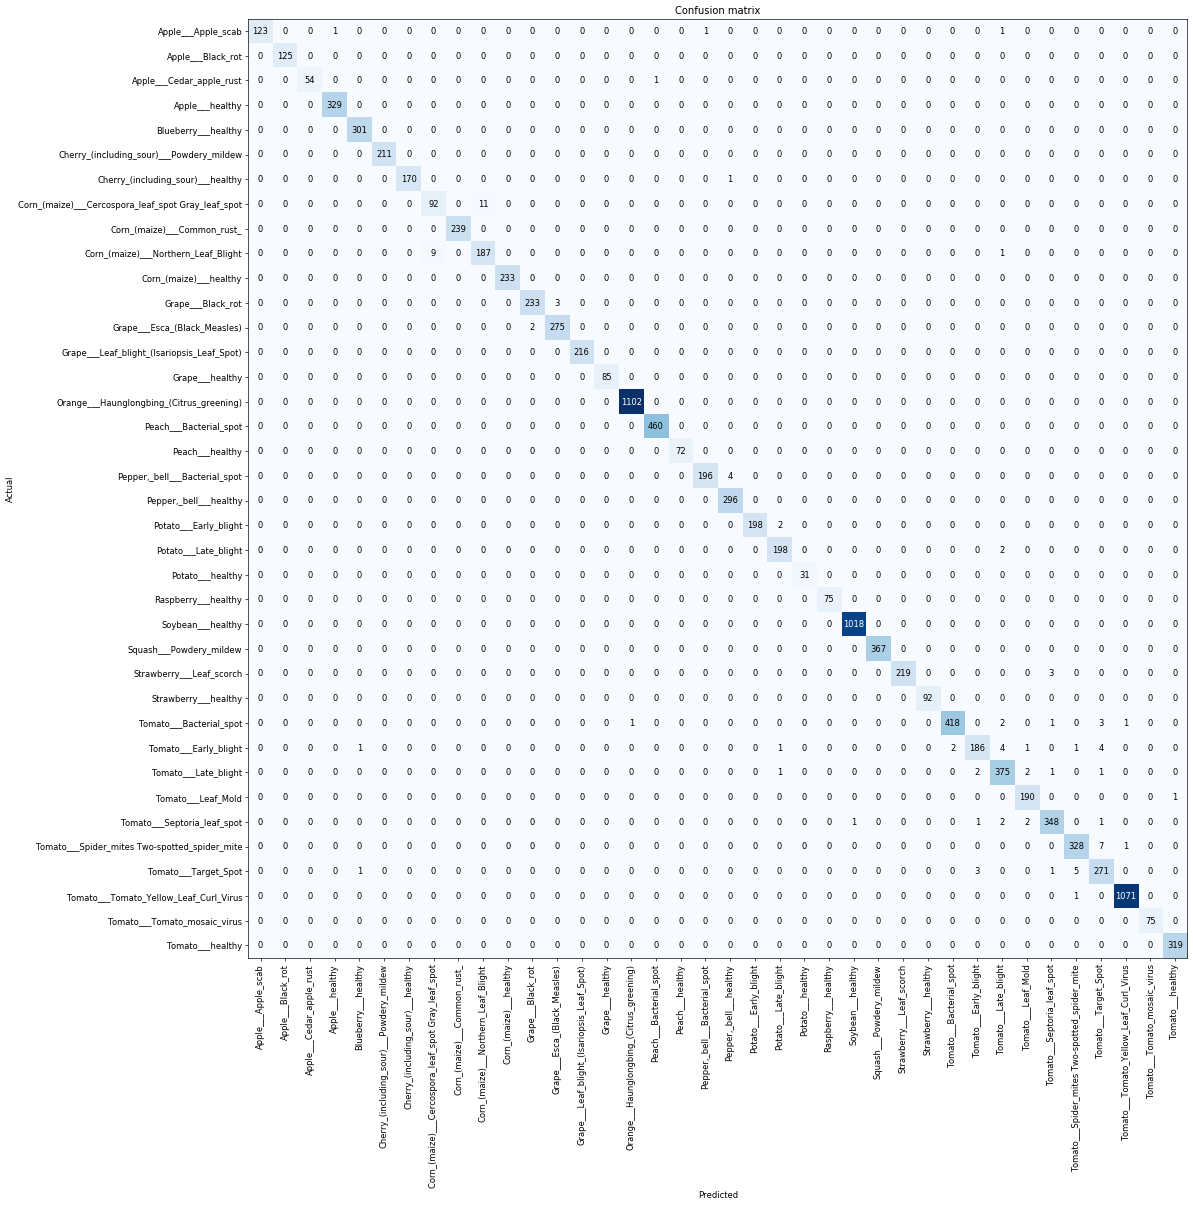

In [0]:
interpret = ClassificationInterpretation.from_learner(model)

interpret.plot_confusion_matrix(figsize=(20,20), dpi=60)

## Hyperparameter Tuning

In [0]:
model.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


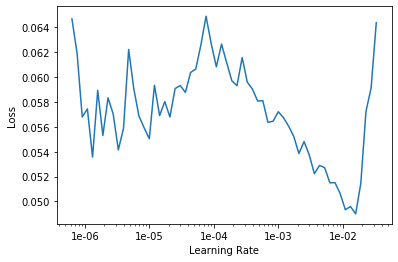

In [0]:
model.recorder.plot()

In [0]:
model.unfreeze() 
model.fit_one_cycle(3, max_lr=slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.561956,0.302611,0.903273,0.096727,08:39
1,0.141962,0.132853,0.954027,0.045973,08:41
2,0.044955,0.035089,0.991357,0.008643,08:26


In [0]:
model.fit_one_cycle(5, max_lr=slice(1e-03, 1e-02))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.148743,0.178906,0.946304,0.053696,08:29
1,0.166799,0.151990,0.949798,0.050202,08:25
2,0.088447,0.070450,0.975451,0.024549,08:14
3,0.042260,0.015364,0.995127,0.004873,08:14
4,0.021949,0.011512,0.996322,0.003678,08:10


In [0]:
model.save('train_lr_8_cycles')

In [0]:
model.freeze()
model.lr_find()
model.recorder.plot()

In [0]:
lr = 1e-3/2
model.fit_one_cycle(2, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.015717,0.011547,0.996322,0.003678,08:07
1,0.016862,0.010284,0.996598,0.003402,08:03


In [0]:
model.fit_one_cycle(3, slice(lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.019133,0.011235,0.996506,0.003494,08:13
1,0.019883,0.010931,0.996690,0.003310,08:15
2,0.016578,0.010890,0.996690,0.003310,08:21


In [0]:
model.save('train_final5_cycles')

In [0]:
model.load('train_final5_cycles')

Learner(data=ImageDataBunch;

Train: LabelList (43429 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab
Path: PlantDiseaseDatai;

Valid: LabelList (10876 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab
Path: PlantDiseaseDatai;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 

## Export Model

In [0]:
model.export('export_resnet34_model.pkl')

In [0]:
!pwd

/content/gdrive/My Drive/AgricAI


In [0]:
cd PlantDiseaseDatai/

/content/gdrive/My Drive/AgricAI/PlantDiseaseDatai


In [0]:
!pwd

/content/gdrive/My Drive/AgricAI/PlantDiseaseDatai


In [0]:
ls

export_resnet34_model.pkl  models/  plant_resnet34_model.pth  Test/  Train/
